![](https://lh3.googleusercontent.com/feO1qyjcQF2k5M-dInanfeeJpkCRvlsFDBTSQZPpzGnR7rh2VlhqF7iIE_KAAxZ6_yV7qpuR4vaziU5MEZFHI1NIbyax2JqdNA=s750)

## Introduction

### Data

This project aims to generate a model to predict the presence of a heart disease. [The UCI heart disease database](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/) contains 76 attributes, but all published experiments refer to using a subset of 14. The target attribute is an integer valued from 0 (no presence) to 4. However, for sake of simplicity it will be reduced to binary classification, i.e, `0` vs `0 <`. 

*The authors of the databases: Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.*

### Attributes

|  | Description | Variable | Type |
|:---------|:---------------------------------------------------------------------------------------------|:-----------|:--------|
| age | age in years | continuous | `int` |
| sex | 1 = male, 0 = female | categorial | `int` |
| cp | chest pain type: 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic | categorial | `int` |
| trestbps | resting blood pressure in mm Hg | continuous | `float` |
| chol | serum cholestoral in mg/dl | continuous | `float` |
| fbs | fasting blood sugar > 120 mg/dl: 1 = true, 0 = false | categorial | `int` |
| restecg | 0: normal, 1: having ST-T wave abnormality, 2: left ventricular hypertrophy | categorial | `int` |
| thalach | maximum heart rate achieved | continuous | `float` |
| exang | exercise induced angina (1 = yes; 0 = no) | categorial | `int` |
| oldpeak | ST depression induced by exercise relative to rest | continuous | `float` |
| slope | the slope of the peak exercise ST segment: 1: upsloping, 2: flat, 3: downsloping | categorial | `int` |
| ca | number of major vessels: (0-3) colored by flourosopy | continuous | `int` |
| thal | 3: normal, 6: fixed defect, 7: reversable defect | categorial | `int` |
| target | diagnosis of heart disease: (0 = false, 1 = true | categorial | `int` |


### Flow

[Data fetching](#data-fetching) --> [Wrangling](#wrangling) --> [Data analysis]() --> [Modeling]() --> [evaluation]()

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm

## Configuration

In [2]:
%matplotlib inline
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
### Data fetching

In [4]:
path_cleveland = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
path_hungary = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data"
path_swiss = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data"
path_veniceb = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data"

paths = [path_cleveland, path_hungary, path_swiss, path_veniceb]
names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang",
 "oldpeak", "slope", "ca", "thal", "target"]
df = pd.concat(pd.read_csv(path, names=names) for path in paths)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67.0,1.0,4.0,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67.0,1.0,4.0,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37.0,1.0,3.0,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41.0,0.0,2.0,130,204,0,2,172,0,1.4,1,0.0,3.0,0


## Wrangling

### Handling missing values

In [5]:
df.replace("?", np.nan, inplace=True)
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64

In [6]:
df.dropna(axis=0, inplace=True)
df.reset_index(drop = True, inplace = True)

### Correcting data types

In [7]:
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')
df[['age', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'ca', 'slope', 'thal']] = df[['age', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'ca', 'slope', 'thal']].astype(int)
df[['trestbps', 'chol', 'thalach', 'oldpeak']] = df[['trestbps', 'chol', 'thalach', 'oldpeak']].astype(float)
df['target'].replace(to_replace=[1, 2, 3, 4], value=1, inplace=True)

## Exploritory data analysis

### Target

[<matplotlib.patches.Rectangle object at 0x126131f60>, <matplotlib.patches.Rectangle object at 0x126131f28>]


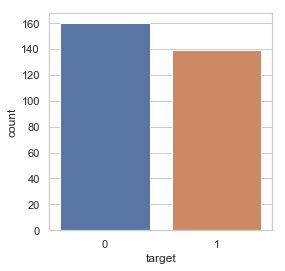

In [8]:
fig_target, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
sns.countplot(x='target', data=df, ax=ax)

for i, p in enumerate(ax.patches):
    count = df['target'].value_counts().values[i]
    ax.text(p.get_x() + p.get_width() / 2.,
            p.get_height() + 3,
            )